# Stochastic Procesess
Let's define a random variable sequence

$$\{y_{t}\}^{+\infty}_{-\infty} = \{ \dots,y_{-1},y_{0},y_{1},y_{2},\dots,y_{T},y_{T+1},y_{T+2},\dots \}$$

A time series is defined as a realization of the previous random variable sequence

$$\{y_{t}\}_{t=1}^{T} = \{ y_{1},y_{2},y_{3},\dots,y_{T-2},y_{T-1},y_{T}\}$$

## 1 White noise

This proces is denoted by

$$y_{t} = \epsilon_{t} $$
$$\epsilon_{t} \sim i.i.d.(0,\sigma^{2})$$

to understand better this proces, lets simulate a particular case of this

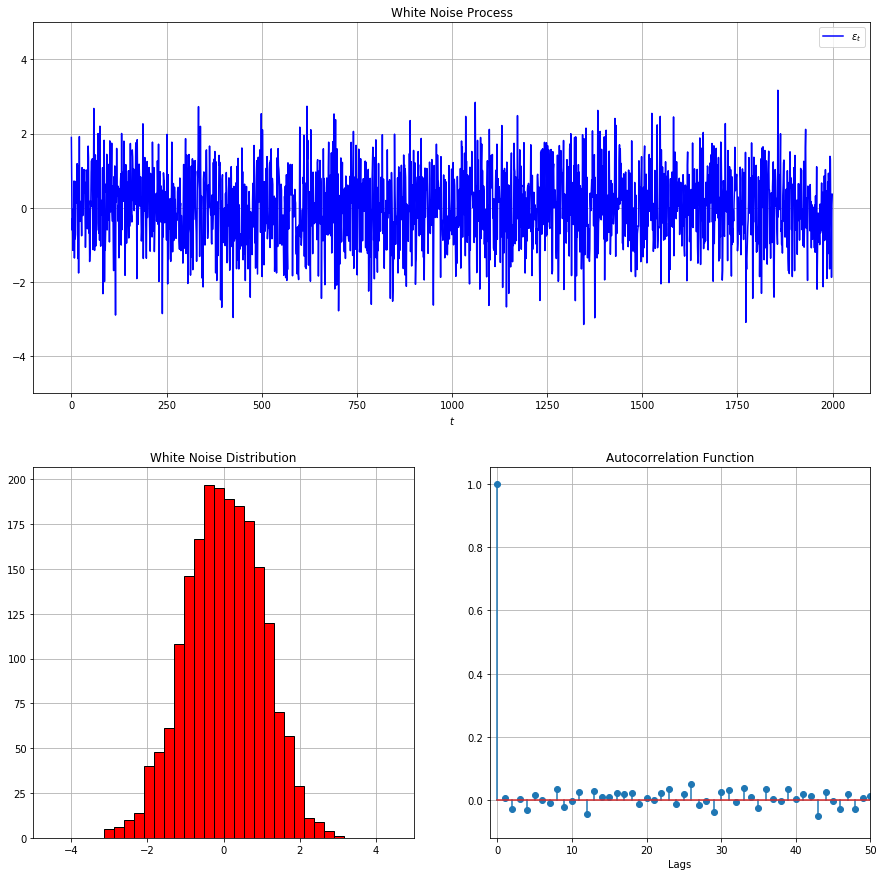

In [1]:
# import some useful libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# seed the pseudorandom number generator
from random import seed
from random import gauss
# seed random number generator
seed(1)
# set the size of the sample size
T = 2100 # sample size 2000, we are going to burn the 100 first obs to avoid initalization problem
# generate some Gaussian values
e = np.zeros(T)
for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
e = e[100:]    
# ploting the series

save_figures = True

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(e,'b',linewidth=1.5,label='$\epsilon_{t}$')
plt.grid(which='major')
plt.legend()
plt.title('White Noise Process')
plt.xlabel('$t$')
plt.ylim(-5,5)

plt.subplot(G[1,0])
plt.grid(which='major',zorder=0) # z order to set the layer that goes first
plt.hist(e,color='red',edgecolor='black',bins=24,zorder=3)
plt.title('White Noise Distribution')
plt.xlim(-5,5)

plt.subplot(G[1,1]) 
lag_acf = acf(e, nlags=300)
plt.stem(range(0,len(lag_acf)),lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,50)

plt.show()

As we can see a White Noise Process has:

- Mean equal to zero: 
$$E[\epsilon_{t}]=0$$
- Variance equal to $\sigma^{2}$:
$$E[\epsilon_{t}^{2}]=\sigma^{2}$$ 
- No correlation in time: 
$$\begin{array}{ll}
cov(\epsilon_{t} \epsilon_{t-s})=\sigma^{2}, & s = 0 \\
cov(\epsilon_{t} \epsilon_{t-s})=0, & s\neq 0 \\
\end{array}$$
         
In this particular case when $\epsilon_{t}~\sim~N(0,\sigma^{2})$ and $\sigma^{2}$ is equal to 1, the process is called Gaussian White Noise Process


## 2 AR Procesess

### 2.1 AR(1)

An AR(1) process is a process that satifies the next equation in differences

$$y_{t} = c + \phi_{1}y_{t-1} + \epsilon_{t}$$
$$\epsilon_{t} \sim iid(0,\sigma^{2})$$

If we want to make inference with these procesess, they must satisfy stationarity conditions, for weak stationarity is just enough that the first two moments do not depend on time $t$. 

- $E[y_{t}] = E[y_{t-1}] = \dots = E[y_{t-j}] = \mu$
- $var(y_{t}) = var(y_{t-1}) = \dots = var(y_{t-j}) = \Gamma_{0}$
- $cov(y_{t},y_{t-j}) = cov(y_{t-s},y_{t-s-j})= \Gamma_{j}$

In the case of AR(1) it must satisfy $|\phi_{1}|<1$ for stationarity.

**Mean**
$$ \begin{array}{rl}
    E[y_{t}] = & E[c] + E[\phi_{1} y_{t-1}] + E[\epsilon_{t}] \\
    E[y_{t}] = & c + \phi_{1} E[y_{t-1}] + 0 \\
    \mu      = & c + \phi_{1} \mu + 0 \\
    \mu      = & \dfrac{c}{1-\phi_{1}}
   \end{array}$$
   
**Variance**
$$ \begin{array}{rl}
    var(y_{t}) = & var(c) + var(\phi_{1} y_{t-1}) + var(\epsilon_{t}) \\
    var(y_{t}) = & 0 + \phi_{1}^{2} var(y_{t-1}) + \sigma^{2}\\
    \Gamma_{0} = & \phi_{1}^{2} \Gamma_{0} + \sigma^{2} \\
    \Gamma_{0} = & \dfrac{\sigma^{2}}{1-\phi_{1}^{2}}
   \end{array}$$

**Covariance** 

Lets consider
$$(y_{t}-\mu) = \phi_{1}(y_{t-1}-\mu) + \epsilon_{t}$$

j=1: $\Gamma_{1} = E(y_{t}-\mu)(y_{t-1}-\mu)$

$$ \begin{array}{rl}
    E(y_{t}-\mu)(y_{t-1}-\mu) = & E[\phi_{1}(y_{t-1}-\mu)(y_{t-1}-\mu)] + E[\epsilon_{t}(y_{t-1}-\mu)] \\
    E(y_{t}-\mu)(y_{t-1}-\mu) = & \phi_{1}E[(y_{t-1}-\mu)^{2}] + 0\\
    \Gamma_{1} = & \phi_{1} \Gamma_{0} \\
   \end{array}$$
   
j=2: $\Gamma_{2} = E(y_{t}-\mu)(y_{t-2}-\mu)$

$$ \begin{array}{rl}
    E(y_{t}-\mu)(y_{t-2}-\mu) = & E[\phi_{1}(y_{t-1}-\mu)(y_{t-2}-\mu)] + E[\epsilon_{t}(y_{t-2}-\mu)] \\
    E(y_{t}-\mu)(y_{t-2}-\mu) = & \phi_{1}E[(y_{t-1}-\mu)(y_{t-2}-\mu)] + 0\\
    \Gamma_{2} = & \phi_{1} \Gamma_{1} \\
    \Gamma_{2} = & \phi_{1}^{2} \Gamma_{0} \\
   \end{array}$$
   
j=j: $\Gamma_{j} = E(y_{t}-\mu)(y_{t-j}-\mu)$

$$ \begin{array}{rl}
    E(y_{t}-\mu)(y_{t-j}-\mu) = & E[\phi_{1}(y_{t-1}-\mu)(y_{t-j}-\mu)] + E[\epsilon_{t}(y_{t-j}-\mu)] \\
    E(y_{t}-\mu)(y_{t-j}-\mu) = & \phi_{1}E[(y_{t-1}-\mu)(y_{t-j}-\mu)] + 0\\
    \Gamma_{j} = & \phi_{1} \Gamma_{j-1} \\
    \Gamma_{j} = & \phi_{1}^{j} \Gamma_{0} \\
   \end{array}$$   
   
From this part apears the ergodicity condition, that means
$$\sum_{j=0}^{\infty} |\Gamma_{j}| < + \infty$$

And we can construct the autocorrelation functión
$$\gamma_{j} = \dfrac{\Gamma_{j}}{\Gamma_{0}} = \phi_{1}^{j}, \forall j = 1,2,\dots$$

Lets simulate an AR(1) process

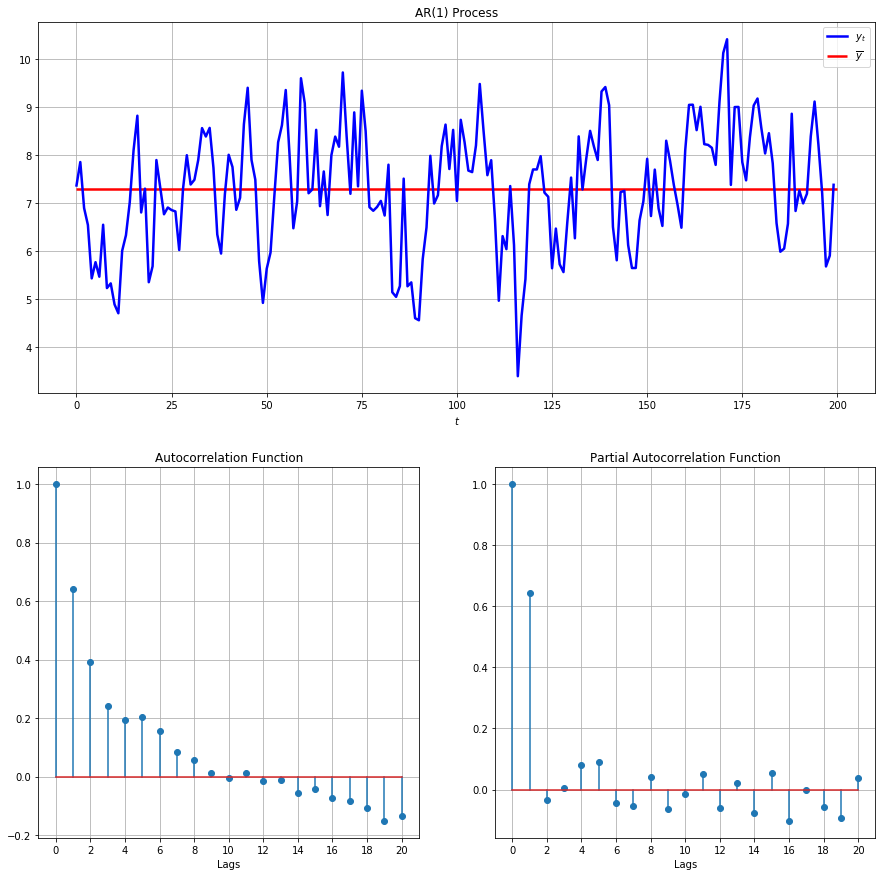

In [2]:
import matplotlib.ticker as mticker
# seed random number generator
seed(1)
# set the size of the parameters
T     = 300   # sample size 200, we are going to burn the 100 first obs to avoid initalization problem
phi_1 = 0.7   # python let us to use greek lethers but without subindex
c     = 2   # the constant
# generate some Gaussian values
e = np.zeros(T)
y = np.zeros(T)

for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
for k in range(T-1):
    y[k+1] = c + phi_1*y[k] + e[k+1]

e = e[100:]
y = y[100:]

# Number of lags to evaluate acf and pacf
plag = 20

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(y,'b',linewidth=2.5,label='$y_{t}$')
plt.hlines(np.mean(y), xmin=0, xmax=T-100, color='r', linewidth=2.5, linestyle='-',label='$\overline{y}$')
plt.grid(which='major')
plt.legend()
plt.title('AR(1) Process')
plt.xlabel('$t$')

plt.subplot(G[1,0])
lag_acf = acf(y, nlags=plag)
plt.stem(range(0,len(lag_acf)),lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.subplot(G[1,1])
lag_pacf = pacf(y, nlags=plag)
plt.stem(range(0,len(lag_pacf)),lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

By construction $y_{t}$ is a stationary time series, from there we can see that the series keep around for the same mean over time and also keep the same variance overtime. 

The Auto Correlation Function (ACF) shows the relation between $y_{t}$ and $y_{t-j}$, as we can see that relation has a progresive decayment lags.

The Partial Auto Correlation Function (PACF) shows the relation between $y_{t}$ and $y_{t-j}$ controling by intermediate terms $y_{t-k}$ where $k\neq j$. From this we can see that the strongest relation is obtained with the first lag and the relation with greater lags falls quickly.

The previous is characteristic of an AR(1) process, the ACF will show a progresive decayment over lags while PACF shows the strongest relation with lag 1 and a fast decayment with greater lags.

### 2.2 AR(2)

An AR(2) process is a process that satifies the next equation in differences

$$y_{t} = c + \phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \epsilon_{t}$$
$$\epsilon_{t} \sim i.i.d. (0,\sigma^{2})$$

If $y_{t}$ is stationary then
- $E[y_{t}] = E[y_{t-1}] = \dots = E[y_{t-j}] = \mu$
- $var(y_{t}) = var(y_{t-1}) = \dots = var(y_{t-j}) = \Gamma_{0}$
- $cov(y_{t},y_{t-j}) = cov(y_{t-s},y_{t-s-j})= \Gamma_{j}$

In the case of AR(2) it must satisfy that the solutions of the next equation are greater than 1

$$(1 - \phi_{1}z - \phi_{2}z^{2}) = 0$$

Note that the solutions $z_{1}$ and $z_{2}$ are the inverse of the eigenvalues of the equation in differences, so with $z_{1}$ and $z_{2}$ greater than 1 we ensure that the eigenvalues are less than 1 and with that the process is stationary.

Once the AR(2) process is confirmed to be stationary, let's calculate the moments of the $y_{t}$ series.

**Mean**
$$ \begin{array}{rl}
    E[y_{t}] = & E[c] + E[\phi_{1} y_{t-1}] + E[\phi_{2} y_{t-2}]  + E[\epsilon_{t}] \\
    E[y_{t}] = & c + \phi_{1} E[y_{t-1}] + \phi_{2} E[y_{t-2}] + 0 \\
    \mu      = & c + \phi_{1} \mu + \phi_{2} \mu + 0 \\
    \mu      = & \dfrac{c}{1-\phi_{1}-\phi_{2}}
   \end{array}$$
   
**Variance and covariance**

Lets replace $c$ from the previous equation
$$y_{t} = \mu (1-\phi_{1}-\phi_{2})+\phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \epsilon_{t}$$
$$(y_{t}-\mu) = \phi_{1} (y_{t-1}-\mu) + \phi_{2} (y_{t-2}-\mu) + \epsilon_{t}$$

From this, we can get the Yule-Walker equation
$$E(y_{t}-\mu)(y_{t-j}-\mu) = \phi_{1} E(y_{t-1}-\mu)(y_{t-j}-\mu) + \phi_{2} E(y_{t-2}-\mu)(y_{t-j}-\mu) + E[\epsilon_{t}(y_{t-j}-\mu)]$$

And by replacing $j$ we can get the variance and autocovariances

$j=0$
$$\Gamma_{0} = \phi_{1} \Gamma_{1} + \phi_{2} \Gamma_{2} + \sigma^{2}$$
$j=1$
$$\Gamma_{1} = \phi_{1} \Gamma_{0} + \phi_{2} \Gamma_{1} + 0$$
$j=2$
$$\Gamma_{2} = \phi_{1} \Gamma_{1} + \phi_{2} \Gamma_{0} + 0$$
$j\geq 2$
$$\Gamma_{j} = \phi_{1} \Gamma_{j-1} + \phi_{2} \Gamma_{j-2} + 0$$

Another way of obtaining the variance and covanriance is with the Wald Representation, for this we have to work with the lag operator. Let's go back to the following equation

$$(y_{t}-\mu) = \phi_{1} (y_{t-1}-\mu) + \phi_{2} (y_{t-2}-\mu) + \epsilon_{t}$$
If we apply the lag opperator we have

$$(y_{t}-\mu) = \phi_{1} L(y_{t}-\mu) + \phi_{2}L^{2} (y_{t}-\mu) + \epsilon_{t}$$
$$(1-\phi_{1}L - \phi_{2}L^{2})(y_{t}-\mu) = \epsilon_{t}$$

If $y_{t}$ is stationary then happens that
$$(1-\phi_{1}L - \phi_{2}L^{2})(\psi_{0}L^{0} + \psi_{1}L^{1} + \psi_{2} L^{2} + \psi_{3} L^{3} + \psi_{4} L^{4} + \dots) = 1$$

With this the process $y_{t}$ could be reexpresed as
$$(1-\phi_{1}L - \phi_{2}L^{2})(y_{t}-\mu) = \epsilon_{t}$$
$$(y_{t}-\mu) = (1-\phi_{1}L - \phi_{2}L^{2})^{-1}\epsilon_{t}$$
$$(y_{t}-\mu) = (\psi_{0}L^{0} + \psi_{1}L^{1} + \psi_{2} L^{2} + \psi_{3} L^{3} + \psi_{4} L^{4} + \dots)\epsilon_{t}$$
$$(y_{t}-\mu) = \sum_{k=0}^{\infty} \psi_{k} \epsilon_{t-k}$$

This last expression is known as the Wald representation of an AR process, from this we can get the variances and autocovariances

$$ \Gamma_{j} = E\left(\sum_{k=0}^{\infty}\psi_{k}\epsilon_{t-k}\right)\left(\sum_{k=0}^{\infty}\psi_{k}\epsilon_{t-j-k}\right)$$



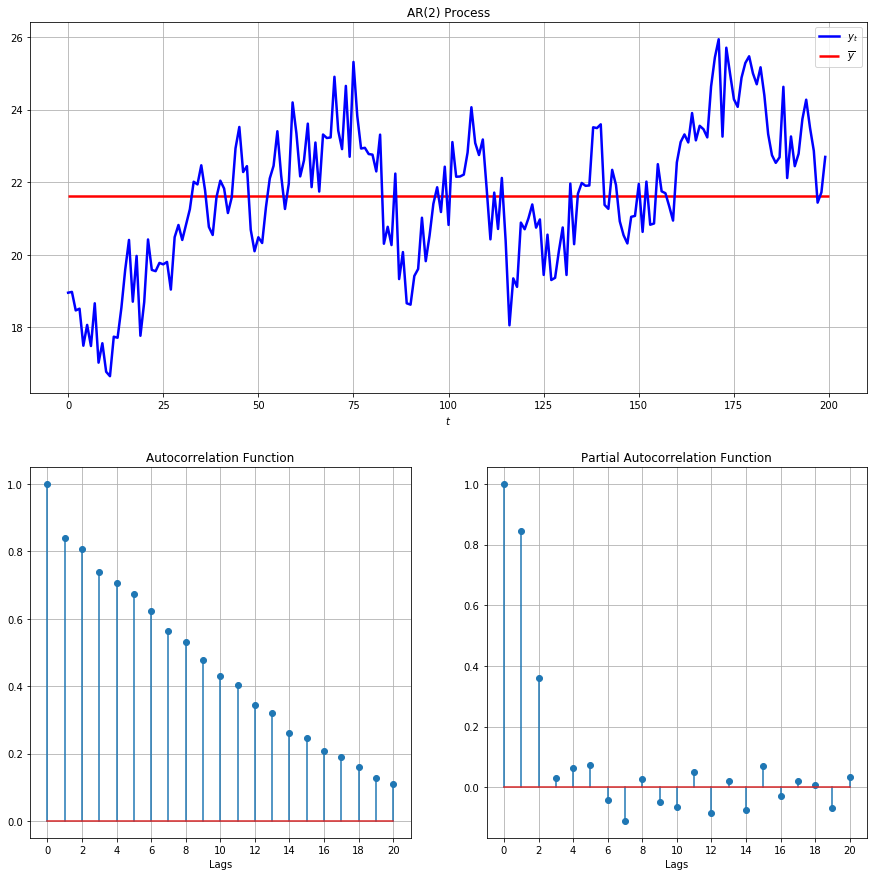

In [3]:
# seed random number generator
seed(1)
# set the size of the parameters
T     = 300   # sample size 200, we are going to burn the 100 first obs to avoid initalization problem
phi_1 = 0.55   # python let us to use greek lethers but without subindex
phi_2 = 0.35 
c     = 2   # the constant
# generate some Gaussian values
e = np.zeros(T)
y = np.zeros(T)

for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
for k in range(T-2):
    y[k+2] = c + phi_1*y[k+1] + phi_2*y[k]+ e[k+2]

e = e[100:]
y = y[100:]

# Number of lags to evaluate acf and pacf
plag = 20

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(y,'b',linewidth=2.5,label='$y_{t}$')
plt.hlines(np.mean(y), xmin=0, xmax=T-100, color='r', linewidth=2.5, linestyle='-',label='$\overline{y}$')
plt.grid(which='major')
plt.legend()
plt.title('AR(2) Process')
plt.xlabel('$t$')

plt.subplot(G[1,0])
lag_acf = acf(y, nlags=plag)
plt.stem(range(0,len(lag_acf)),lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.subplot(G[1,1])
lag_pacf = pacf(y, nlags=plag)
plt.stem(range(0,len(lag_pacf)),lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

From the graphic of the series we can see that the series keep around for the same mean over time and also keep the same variance overtime.

The ACF that the relation has a progresive decayment over lags, while the PACF that the strongest relation is obtained with the first and second lags and the relation with greater lags falls quickly.

### 2.3 AR(p)

An AR(p) process is a process that satifies the next equation in differences

$$y_{t} = c + \phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \dots + \phi_{p} y_{t-p} + \epsilon_{t}$$
$$\epsilon_{t} \sim i.i.d. (0,\sigma^{2})$$

If $y_{t}$ is stationary then
- $E[y_{t}] = E[y_{t-1}] = \dots = E[y_{t-j}] = \mu$
- $var(y_{t}) = var(y_{t-1}) = \dots = var(y_{t-j}) = \Gamma_{0}$
- $cov(y_{t},y_{t-j}) = cov(y_{t-s},y_{t-s-j})= \Gamma_{j}$

In the case of AR(p) it must satisfy that the solutions of the next equation are greater than 1

$$(1 - \phi_{1}z - \phi_{2}z^{2}-\dots \phi_{p}z^{p}) = 0$$

Once the AR(p) process is confirmed to be stationary, let's calculate the moments of the $y_{t}$ series.

**Mean**
$$ \begin{array}{rl}
    E[y_{t}] = & E[c] + E[\phi_{1} y_{t-1}] + E[\phi_{2} y_{t-2}] + \dots +E[\phi_{p} y_{t-p}] + E[\epsilon_{t}] \\
    E[y_{t}] = & c + \phi_{1} E[y_{t-1}] + \phi_{2} E[y_{t-2}] + \dots \phi_{p} E[y_{t-p}]+  0 \\
    \mu      = & c + \phi_{1} \mu  + \phi_{2} \mu + \dots + \phi_{p} \mu+ 0 \\
    \mu      = & \dfrac{c}{1-\phi_{1}-\phi_{2} - \dots - \phi_{p}}
   \end{array}$$
   
**Variance and covariance**

Lets replace $c$ from the previous equation
$$y_{t} = \mu (1-\phi_{1}-\phi_{2} - \dots - \phi_{p})+\phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \dots + \phi_{p} y_{t-p} + \epsilon_{t}$$
$$(y_{t}-\mu) = \phi_{1} (y_{t-1}-\mu) + \phi_{2} (y_{t-2}-\mu) + \dots + \phi_{p} (y_{t-p}-\mu) + \epsilon_{t}$$

From this, we can get the Yule-Walker equation
$$E(y_{t}-\mu)(y_{t-j}-\mu) = \phi_{1} E(y_{t-1}-\mu)(y_{t-j}-\mu) + \phi_{2} E(y_{t-2}-\mu)(y_{t-j}-\mu) + \dots + \phi_{p} E(y_{t-p}-\mu)(y_{t-j}-\mu) +  E[\epsilon_{t}(y_{t-j}-\mu)]$$

And by replacing $j$ we can get the variance and autocovariances

$j=0$
$$\Gamma_{0} = \phi_{1} \Gamma_{1} + \phi_{2} \Gamma_{2} + \dots + \phi_{p} \Gamma_{p} + \sigma^{2}$$
$j\geq1$
$$\Gamma_{j} = \phi_{1} \Gamma_{j-1} + \phi_{2} \Gamma_{j-2} + \dots + \phi_{p} \Gamma_{j-p}$$


Another way of obtaining the variance and covanriance is with the Wald Representation, for this we have to work with the lag operator. Let's go back to the following equation

$$(y_{t}-\mu) = \phi_{1} (y_{t-1}-\mu) + \phi_{2} (y_{t-2}-\mu) + \dots + \phi_{p} (y_{t-p}-\mu) + \epsilon_{t}$$
If we apply the lag opperator we have

$$(y_{t}-\mu) = \phi_{1} L (y_{t}-\mu) + \phi_{2} L^{2}(y_{t}-\mu) + \dots + \phi_{p} L^{p} (y_{t}-\mu) + \epsilon_{t}$$
$$(1-\phi_{1}L - \phi_{2}L^{2} -\dots - \phi_{p}L^{p})(y_{t}-\mu) = \epsilon_{t}$$

If $y_{t}$ is stationary then happens that
$$(1-\phi_{1}L - \phi_{2}L^{2} -\dots - \phi_{p}L^{p})(\psi_{0}L^{0} + \psi_{1}L^{1} + \psi_{2} L^{2} + \psi_{3} L^{3} + \psi_{4} L^{4} + \dots) = 1$$

With this the process $y_{t}$ could be reexpresed as
$$(1-\phi_{1}L - \phi_{2}L^{2} -\dots - \phi_{p}L^{p})(y_{t}-\mu) = \epsilon_{t}$$
$$(y_{t}-\mu) = (1-\phi_{1}L - \phi_{2}L^{2} -\dots - \phi_{p}L^{p})^{-1}\epsilon_{t}$$
$$(y_{t}-\mu) = (\psi_{0}L^{0} + \psi_{1}L^{1} + \psi_{2} L^{2} + \psi_{3} L^{3} + \psi_{4} L^{4} + \dots)\epsilon_{t}$$
$$(y_{t}-\mu) = \sum_{k=0}^{\infty} \psi_{k} \epsilon_{t-k}$$

This last expression is known as the Wald representation of an AR(p) process, from this we can get the variances and autocovariances

$$ \Gamma_{j} = E\left(\sum_{k=0}^{\infty}\psi_{k}\epsilon_{t-k}\right)\left(\sum_{k=0}^{\infty}\psi_{k}\epsilon_{t-j-k}\right)$$


# 3 MA Procesess
## 3.1. MA(1) Process
A MA(1) process is a process that satifies the next equation in differences

$$y_{t} = \mu + \epsilon_{t} + \theta_{1} \epsilon_{t-1}$$
$$\epsilon_{t} \sim iid(0,\sigma^{2})$$

And for that process the firs two moments are

**Mean**
$$ \begin{array}{rl}
    E[y_{t}] = & E[\mu] + E[\epsilon_{t}] + E[\theta_{1} \epsilon_{t-1}] \\
    E[y_{t}] = & E[\mu] + E[\epsilon_{t}] + \theta_{1} E[\epsilon_{t-1}] \\
    E[y_{t}] = & \mu + 0 + \theta_{1} 0\\
    E[y_{t}] = & \mu 
   \end{array}$$
   
**Variance**
$$ \begin{array}{rl}
    \Gamma_{0} = & E(y_{t}-\mu)(y_{t}-\mu) \\
    \Gamma_{0} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1}) \times \\
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1})\\  
    \end{array} \right]
    \\ 
    \Gamma_{0} = & \sigma^{2} (1+\theta_{1}^{2})\\
    \end{array}$$

**Covariance**

For $\Gamma_{1}$
$$ \begin{array}{rl}
    \Gamma_{1} = & E(y_{t}-\mu)(y_{t-1}-\mu) \\
    \Gamma_{1} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1}) \times \\
    (\epsilon_{t-1} + \theta_{1} \epsilon_{t-2})\\  
    \end{array} \right]
    \\ 
    \Gamma_{1} = & \sigma^{2} \theta_{1}\\
    \end{array}$$
    
For $\Gamma_{2}$
$$ \begin{array}{rl}
    \Gamma_{2} = & E(y_{t}-\mu)(y_{t-2}-\mu) \\
    \Gamma_{2} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1}) \times \\
    (\epsilon_{t-2} + \theta_{1} \epsilon_{t-3})\\  
    \end{array} \right]
    \\ 
    \Gamma_{2} = & 0\\
    \end{array}$$  

For $\Gamma_{j} = 0$ for all $ j\geq 2 $

As we can see, the first two moments does not depend of time, so the MA process is stationary. Form this the ACF is defined as 
$$\gamma_{0} = \dfrac{\Gamma_{j}}{\Gamma_{0}}$$

As long as $\Gamma_{j} = 0$ for all $ j\geq 2 $, we must expect that the ACF will show no dependence after lag 1.

As in AR procesess the MA procesess could be invertible, lets restate the MA(1) with lag operators
$$(y_{t}-\mu) = (1+ \theta_{1}L) \epsilon_{t}$$

From this, if $|\theta_{1}|<1$ then the process is invertible and if we remember that 
$$(1-\phi_{1}L)(\phi_{0}^{0}L^{0} + \phi_{1}^{1}L^{1} + \phi_{2}^{2} L^{2} + \phi_{3}^{3} L^{3} + \phi_{4}^{4} L^{4} + \dots) = 1$$

is true when the process is starionary, we can adapt this to the MA process so the next is true
$$(1-(-\theta_{1})L)((-\theta_{1})^{0}L^{0} + (-\theta_{1})^{1}L^{1} + (-\theta_{1})^{2} L^{2} + (-\theta_{1})^{3} L^{3} + (-\theta_{1})^{4} L^{4} + \dots) = 1$$
$$(1+\theta_{1}L)(1 -\theta_{1}L + \theta_{1}^{2}L - \theta_{1}^{3}L^{2} + \theta_{1}^{4}L^{4} + \dots) = 1$$
So the MA(1) could be reexpresed as a AR($\infty$)
$$(y_{t}-\mu) = (1+ \theta_{1}L) \epsilon_{t}$$
$$(1+ \theta_{1}L)^{-1}(y_{t}-\mu) = \epsilon_{t}$$
$$(1 -\theta_{1}L + \theta_{1}^{2}L - \theta_{1}^{3}L^{2} + \theta_{1}^{4}L^{4} + \dots)(y_{t}-\mu) = \epsilon_{t}$$

from this we should expect that PACF shows progresive decayment over lags.

Let's simulate an MA(1) case

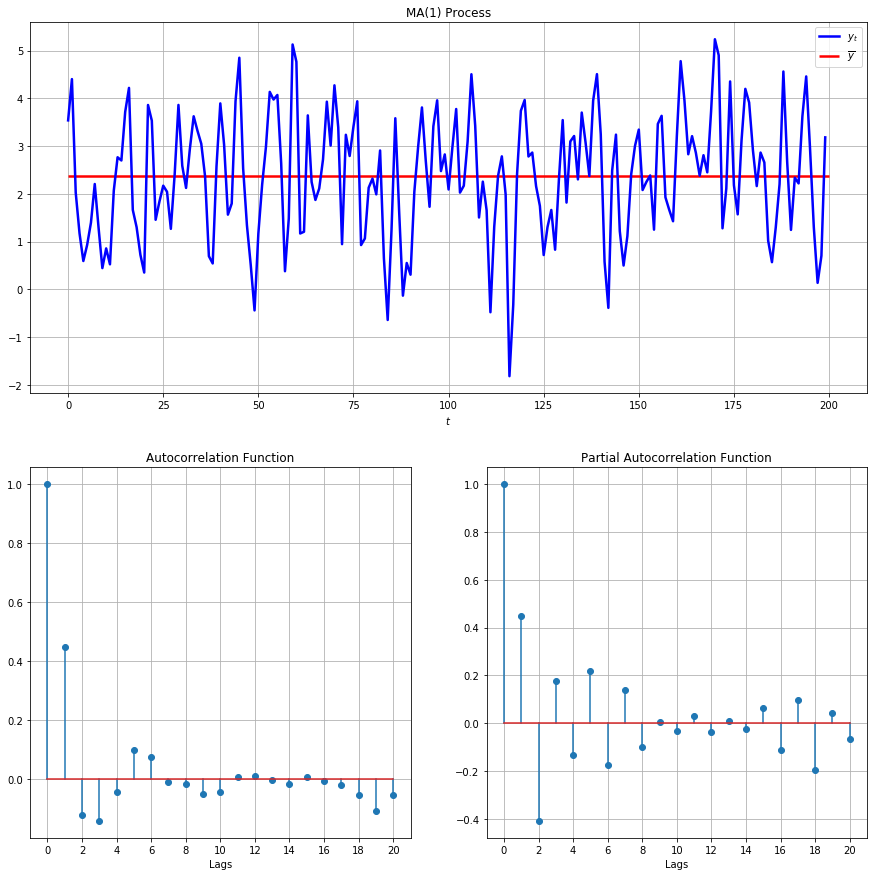

In [4]:
# seed random number generator
seed(1)
# set the size of the parameters
T     = 300   # sample size 200, we are going to burn the 100 first obs to avoid initalization problem
theta_1 = 0.9   # python let us to use greek lethers but without subindex
c     = 2   # the constant
# generate some Gaussian values
e = np.zeros(T)
y = np.zeros(T)

for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
for k in range(T-1):
    y[k+1] = c + e[k+1] + theta_1*e[k]

e = e[100:]
y = y[100:]

# Number of lags to evaluate acf and pacf
plag = 20

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(y,'b',linewidth=2.5,label='$y_{t}$')
plt.hlines(np.mean(y), xmin=0, xmax=T-100, color='r', linewidth=2.5, linestyle='-',label='$\overline{y}$')
plt.grid(which='major')
plt.legend()
plt.title('MA(1) Process')
plt.xlabel('$t$')

plt.subplot(G[1,0])
lag_acf = acf(y, nlags=plag)
plt.stem(range(0,len(lag_acf)),lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.subplot(G[1,1])
lag_pacf = pacf(y, nlags=plag)
plt.stem(range(0,len(lag_pacf)),lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

As we can see, we have an stationary series and the ACF shows a quickly decayment after lag 1 and the PACF whos a progresive decayment over lags

## 3.2. MA(2) Process
A MA(2) process is a process that satifies the next equation in differences

$$y_{t} = \mu + \epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2}$$
$$\epsilon_{t} \sim iid(0,\sigma^{2})$$

And for that process the firs two moments are

**Mean**
$$ \begin{array}{rl}
    E[y_{t}] = & E[\mu] + E[\epsilon_{t}] + E[\theta_{1} \epsilon_{t-1}] +E[\theta_{2} \epsilon_{t-2}] \\
    E[y_{t}] = & E[\mu] + E[\epsilon_{t}] + \theta_{1} E[\epsilon_{t-1}] + \theta_{2} E[\epsilon_{t-2}]\\
    E[y_{t}] = & \mu + 0 + \theta_{1} 0 + \theta_{2} 0\\
    E[y_{t}] = & \mu 
   \end{array}$$
   
**Variance**
$$ \begin{array}{rl}
    \Gamma_{0} = & E(y_{t}-\mu)(y_{t}-\mu) \\
    \Gamma_{0} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2}) \times \\
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2})\\  
    \end{array} \right]
    \\ 
    \Gamma_{0} = & \sigma^{2} (1+\theta_{1}^{2} + \theta_{2}^{2})\\
    \end{array}$$

**Covariance**

For $\Gamma_{1}$
$$ \begin{array}{rl}
    \Gamma_{1} = & E(y_{t}-\mu)(y_{t-1}-\mu) \\
    \Gamma_{1} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2}) \times \\
    (\epsilon_{t-1} + \theta_{1} \epsilon_{t-2} + \theta_{2} \epsilon_{t-3})\\  
    \end{array} \right]
    \\ 
    \Gamma_{1} = & \sigma^{2} (\theta_{1} + \theta_{1}\theta_{2})\\
    \end{array}$$
    
For $\Gamma_{2}$
$$ \begin{array}{rl}
    \Gamma_{2} = & E(y_{t}-\mu)(y_{t-2}-\mu) \\
    \Gamma_{2} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2}) \times \\
    (\epsilon_{t-2} + \theta_{1} \epsilon_{t-3} + \theta_{2} \epsilon_{t-4})\\  
    \end{array} \right]
    \\ 
    \Gamma_{2} = & \sigma^{2}\theta_{2}\\
    \end{array}$$  

For $\Gamma_{j} = 0$ for all $ j\geq 3 $

As we can see, the first two moments does not depend of time, so the MA process is stationary. From this the ACF is defined as 
$$\gamma_{0} = \dfrac{\Gamma_{j}}{\Gamma_{0}}$$

As long as $\Gamma_{j} = 0$ for all $ j\geq 3 $, we must expect that the ACF will show no dependence after lag 2.

Let's restate the MA(2) with lag operators
$$(y_{t}-\mu) = (1+ \theta_{1}L + \theta_{2}L^{2}) \epsilon_{t}$$

This process is invertible if the solutions of the next equations are greater than 1
$$(1+ \theta_{1}L + \theta_{2}L^{2}) = 0$$

Note that the solutions are the inverse of the eigenvalues of the equation in differences, so with solutions greater than 1 we ensure that the eigenvalues are less than 1 and with that the process is invertible.

So the MA(2) could be reexpresed as a AR($\infty$)
$$(y_{t}-\mu) = (1+ \theta_{1}L + \theta_{2}L^{2}) \epsilon_{t}$$
$$(1+ \theta_{1}L + \theta_{2}L^{2})^{-1}(y_{t}-\mu) = \epsilon_{t}$$
$$(\psi_{0}L^{0} + \psi_{1}L^{1} + \psi_{2}L^{2} + \psi_{3} L^{3} + \psi_{4} L^{4} + \dots)(y_{t}-\mu) = \epsilon_{t}$$

from this we should expect that PACF shows progresive decayment over lags.

Let's simulate an MA(2) case

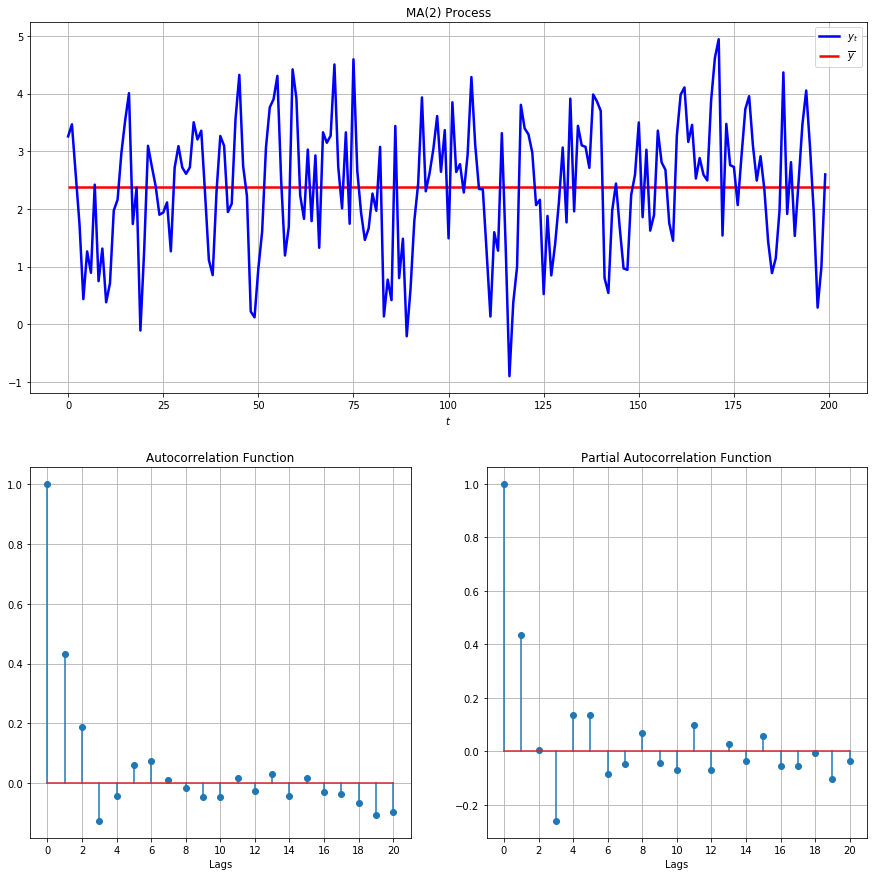

In [5]:
# seed random number generator
seed(1)
# set the size of the parameters
T     = 300   # sample size 200, we are going to burn the 100 first obs to avoid initalization problem
theta_1 = 0.5   # python let us to use greek lethers but without subindex
theta_2 = 0.45
c     = 2   # the constant
# generate some Gaussian values
e = np.zeros(T)
y = np.zeros(T)

for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
for k in range(T-2):
    y[k+2] = c + e[k+2] + theta_1*e[k+1] + theta_2*e[k]

e = e[100:]
y = y[100:]

# Number of lags to evaluate acf and pacf
plag = 20

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(y,'b',linewidth=2.5,label='$y_{t}$')
plt.hlines(np.mean(y), xmin=0, xmax=T-100, color='r', linewidth=2.5, linestyle='-',label='$\overline{y}$')
plt.grid(which='major')
plt.legend()
plt.title('MA(2) Process')
plt.xlabel('$t$')

plt.subplot(G[1,0])
lag_acf = acf(y, nlags=plag)
plt.stem(range(0,len(lag_acf)),lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.subplot(G[1,1])
lag_pacf = pacf(y, nlags=plag)
plt.stem(range(0,len(lag_pacf)),lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

As we can see, we have an stationary series and the ACF shows a quickly decayment after lag 2 and the PACF shows a progresive decayment over lags

## 3.3. MA(q) Process
A MA(q) process is a process that satifies the next equation in differences

$$y_{t} = \mu + \epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + \dots + \theta_{q} \epsilon_{t-q}$$
$$\epsilon_{t} \sim iid(0,\sigma^{2})$$

And for that process the firs two moments are

**Mean**
$$ \begin{array}{rl}
    E[y_{t}] = & E[\mu] + E[\epsilon_{t}] + E[\theta_{1} \epsilon_{t-1}] +E[\theta_{2} \epsilon_{t-2}] + \dots + E[\theta_{q} \epsilon_{t-q}] \\
    E[y_{t}] = & E[\mu] + E[\epsilon_{t}] + \theta_{1} E[\epsilon_{t-1}] + \theta_{2} E[\epsilon_{t-2}] + \dots + \theta_{q} E[\epsilon_{t-q}] \\
    E[y_{t}] = & \mu + 0 + \theta_{1} 0 + \theta_{2} 0 + \dots + \theta_{q} 0\\
    E[y_{t}] = & \mu 
   \end{array}$$
   
**Variance**
$$ \begin{array}{rl}
    \Gamma_{0} = & E(y_{t}-\mu)(y_{t}-\mu) \\
    \Gamma_{0} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + \dots + \theta_{q} \epsilon_{t-q}) \times \\
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + \dots + \theta_{q} \epsilon_{t-q})\\  
    \end{array} \right]
    \\ 
    \Gamma_{0} = & \sigma^{2} (1+\theta_{1}^{2} + \theta_{2}^{2} + \dots + \theta_{q}^{2})\\
    \end{array}$$

**Covariance**

For $\Gamma_{1}$
$$ \begin{array}{rl}
    \Gamma_{1} = & E(y_{t}-\mu)(y_{t-1}-\mu) \\
    \Gamma_{1} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + \dots + \theta_{q} \epsilon_{t-q}) \times \\
    (\epsilon_{t-1} + \theta_{1} \epsilon_{t-2} + \theta_{2} \epsilon_{t-3} + \dots + \theta_{q} \epsilon_{t-q-1})\\  
    \end{array} \right]
    \\ 
    \Gamma_{1} = & \sigma^{2} (\theta_{1} + \theta_{1}\theta_{2} + \theta_{2}\theta_{3} + \dots + \theta_{q-1}\theta_{q})\\
    \end{array}$$
    
For $\Gamma_{2}$
$$ \begin{array}{rl}
    \Gamma_{2} = & E(y_{t}-\mu)(y_{t-2}-\mu) \\
    \Gamma_{2} = & E \left[ \begin{array}{l} 
    (\epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + \dots + \theta_{q} \epsilon_{t-q}) \times \\
    (\epsilon_{t-2} + \theta_{1} \epsilon_{t-3} + \theta_{2} \epsilon_{t-4} + \dots + \theta_{q} \epsilon_{t-q-2})\\  
    \end{array} \right]
    \\ 
    \Gamma_{2} = & \sigma^{2}(\theta_{2} + \theta_{1}\theta_{3} + \theta_{2}\theta_{4} + \dots + \theta_{q-2}\theta_{q} )\\
    \end{array}$$  

In general
$$\begin{array}{ll}
\Gamma_{j} = \left( \theta_{j} + \sum_{k=1}^{q-j}\theta_{k}\theta_{k+j}\right) & 1 \leq j \leq q\\
\Gamma_{j} = 0 & j\geq q
\end{array}$$

As long as $\Gamma_{j} = 0$ for all $ j\geq q+1 $, we must expect that the ACF will show no dependence after lag q.

Let's restate the MA(q) with lag operators
$$(y_{t}-\mu) = (1+ \theta_{1}L + \theta_{2}L^{2} + \dots+ \theta_{q}L^{q}) \epsilon_{t}$$

This process is invertible if the solutions of the next equations are greater than 1
$$(1+ \theta_{1}L + \theta_{2}L^{2} + \dots+ \theta_{q}L^{q}) = 0$$

Note that the solutions are the inverse of the eigenvalues of the equation in differences, so with solutions greater than 1 we ensure that the eigenvalues are less than 1 and with that the process is invertible.

So the MA(2) could be reexpresed as a AR($\infty$)
$$(y_{t}-\mu) = (1+ \theta_{1}L + \theta_{2}L^{2}+ \dots+ \theta_{q}L^{q}) \epsilon_{t}$$
$$(1+ \theta_{1}L + \theta_{2}L^{2} + \dots+ \theta_{q}L^{q})^{-1}(y_{t}-\mu) = \epsilon_{t}$$
$$(\psi_{0}L^{0} + \psi_{1}L^{1} + \psi_{2}L^{2} + \psi_{3} L^{3} + \psi_{4} L^{4} + \dots)(y_{t}-\mu) = \epsilon_{t}$$

from this we should expect that PACF shows progresive decayment over lags.

# 4 ARMA Procesess
An ARMA(p,q) process is a process that satifies the next equation in differences

$$y_{t} = c + \phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \dots + \phi_{p} y_{t-p}+ \epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + \dots + \theta_{q} \epsilon_{t-q}$$
$$\epsilon_{t} \sim iid(0,\sigma^{2})$$

Using the lag operator we have
$$\Phi(L) y_{t} = c + \Theta(L) \epsilon_{t}$$

where
$$\Phi(L) = 1 - \phi_{1}L - \phi_{2}L^{2} - \dots - \phi_{p}L^{p}$$
$$\Theta(L) = 1 + \theta_{1}L + \theta_{2}L^{2} + \dots + \theta_{q}L^{q} $$

If the system is stationary the solutions of the following equation must be greater than 1
$$(1 - \phi_{1}L - \phi_{2}L^{2} - \dots - \phi_{p}L^{p}) = 0$$

And with that we can get the Wald Representation
$$y_{t} = \Phi(L)^{-1} c + \Phi(L)^{-1} \Theta(L) \epsilon_{t}$$
$$y_{t} - \mu = \Psi(L) \epsilon_{t}$$
where
$$\Psi(L) = (\psi_{0}L^{0}+\psi_{1}L^{1}+\psi_{2}L^{2}+\dots+\psi_{j}L^{j}+ ... )$$

As the ARMA(p,q) has AR and MA components, the ACF and PACF will show a progresive decayment over time

Let's simulate an ARMA(1,2)

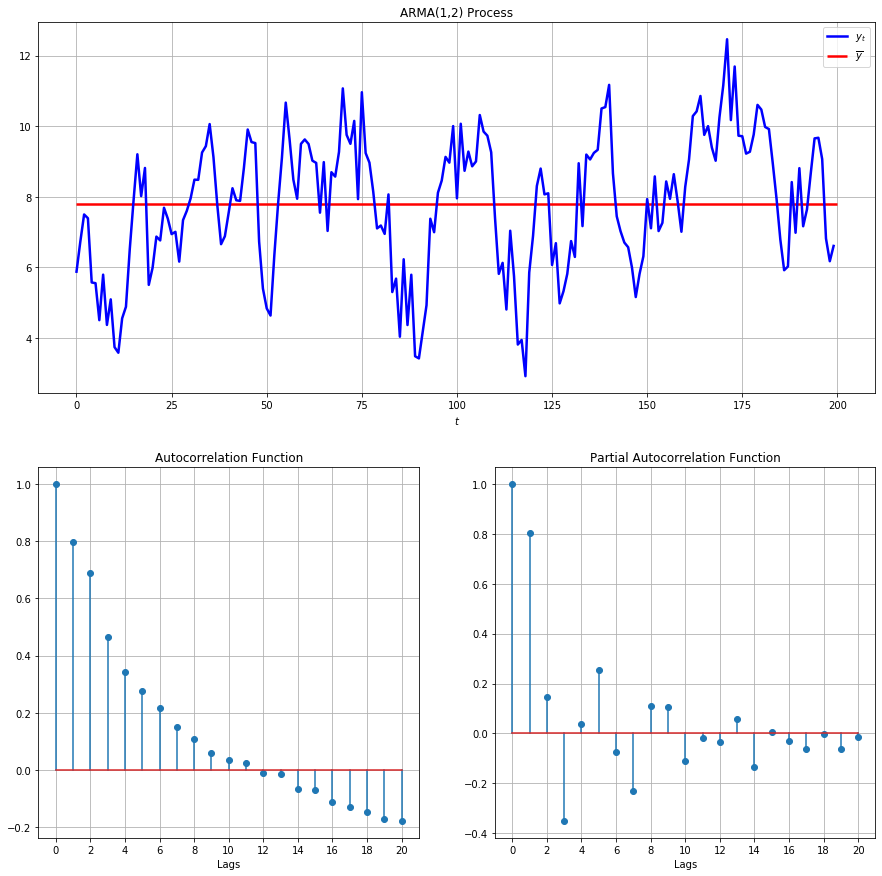

In [6]:
# seed random number generator
seed(1)
# set the size of the parameters
T     = 300   # sample size 200, we are going to burn the 100 first obs to avoid initalization problem
phi_1 = 0.7
theta_1 = 0.1   # python let us to use greek lethers but without subindex
theta_2 = 0.7
c     = 2   # the constant
# generate some Gaussian values
e = np.zeros(T)
y = np.zeros(T)

for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
for k in range(T-2):
    y[k+2] = c + phi_1*y[k+1] + e[k+2] + theta_1*e[k+1] + theta_2*e[k]

e = e[100:]
y = y[100:]

# Number of lags to evaluate acf and pacf
plag = 20

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(y,'b',linewidth=2.5,label='$y_{t}$')
plt.hlines(np.mean(y), xmin=0, xmax=T-100, color='r', linewidth=2.5, linestyle='-',label='$\overline{y}$')
plt.grid(which='major')
plt.legend()
plt.title('ARMA(1,2) Process')
plt.xlabel('$t$')

plt.subplot(G[1,0])
lag_acf = acf(y, nlags=plag)
plt.stem(range(0,len(lag_acf)),lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.subplot(G[1,1])
lag_pacf = pacf(y, nlags=plag)
plt.stem(range(0,len(lag_pacf)),lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,plag+1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()